In [1]:
#| label: fig1cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm

sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
metrics_dir = Path("../data/ukbb_gcn_scaling/flops")

In [2]:
df_flop = pd.DataFrame()
for p in metrics_dir.glob("*.txt"):
    df = pd.read_csv(p, sep="\t")
    exp = pd.DataFrame(df['name'].str.split('-|_', n=-1, expand=True, regex=True).values.reshape(-1, 2).T)
    exp.columns = exp.iloc[0]
    exp.drop(0, inplace=True)
    exp = exp.reset_index(drop=True)
    exp = exp.astype(np.int64)
    df = pd.concat([exp, df], axis=1)
    df_metrics = pd.read_csv(str(p).replace('.txt', '_metrics.tsv'), sep="\t")
    df['test_r2'] = df_metrics.loc[df_metrics['metricName'] == 'test/r2', 'metricValue'].values[0].astype(np.float64)
    df['cpu_percent_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.cpu.percent.avg', 'metricValue'].mean()
    df['cpu_percent_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.cpu.percent.avg', 'metricValue'].max()
    df['gpu_used_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.gpu.0.used_memory', 'metricValue'].mean() / 1e+9
    df['gpu_used_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.gpu.0.used_memory', 'metricValue'].max() / 1e+9
    df['sys_load_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.load.avg', 'metricValue'].mean()
    df['sys_load_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.load.avg', 'metricValue'].max()
    df['ram_used_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.ram.used', 'metricValue'].mean() / 1e+9
    df['ram_used_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.ram.used', 'metricValue'].max() / 1e+9
    df_flop = pd.concat([df_flop, df])

# df_flop.loc[:, ['N', 'W', 'GCL', 'F', 'K', 'FCL','M',]]= df_flop.loc[:, ['N', 'W', 'GCL', 'F', 'K', 'FCL','M',]].astype(np.int64)


<Axes: xlabel='sys_load_max', ylabel='test_r2'>

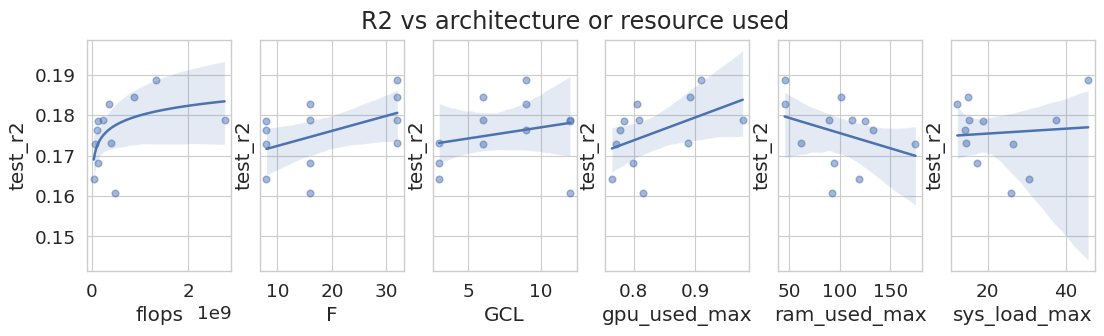

In [3]:
fig, axes = plt.subplots(1, 6, sharey=True)
fig.set_size_inches(13, 3)
fig.suptitle("R2 vs architecture or resource used")
sns.regplot(x='flops', y='test_r2', data=df_flop, logx=True, scatter_kws={'alpha':0.5}, ax=axes[0])
sns.regplot(x='F', y='test_r2', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[1])
sns.regplot(x='GCL', y='test_r2', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[2])
sns.regplot(x='gpu_used_max', y='test_r2', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[3])
sns.regplot(x='ram_used_max', y='test_r2', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[4])
sns.regplot(x='sys_load_max', y='test_r2', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[-1])


<Axes: xlabel='sys_load_avg', ylabel='flops'>

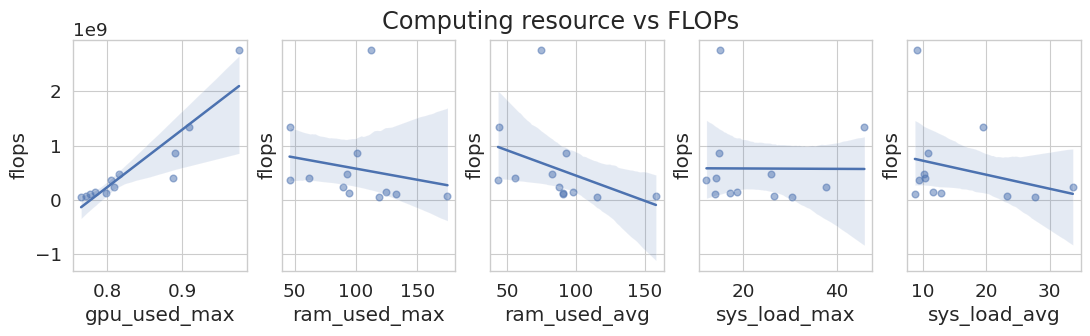

In [4]:
fig, axes = plt.subplots(1, 5, sharey=True)
fig.set_size_inches(13, 3)
fig.suptitle("Computing resource vs FLOPs")
sns.regplot(x='gpu_used_max', y='flops', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[0])
sns.regplot(x='ram_used_max', y='flops', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[1])
sns.regplot(x='ram_used_avg', y='flops', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[2])
sns.regplot(x='sys_load_max', y='flops', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[3])
sns.regplot(x='sys_load_avg', y='flops', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[-1])


<Axes: xlabel='sys_load_avg', ylabel='F'>

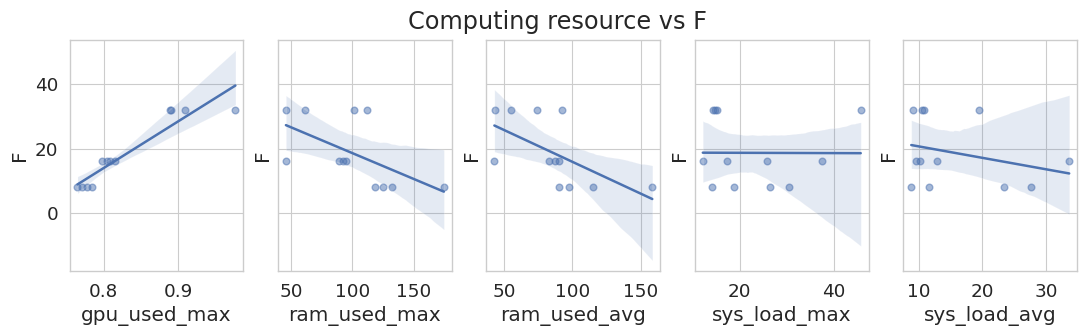

In [5]:
fig, axes = plt.subplots(1, 5, sharey=True)
fig.set_size_inches(13, 3)
fig.suptitle("Computing resource vs F")
sns.regplot(x='gpu_used_max', y='F', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[0])
sns.regplot(x='ram_used_max', y='F', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[1])
sns.regplot(x='ram_used_avg', y='F', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[2])
sns.regplot(x='sys_load_max', y='F', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[3])
sns.regplot(x='sys_load_avg', y='F', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[-1])


<Axes: xlabel='sys_load_avg', ylabel='GCL'>

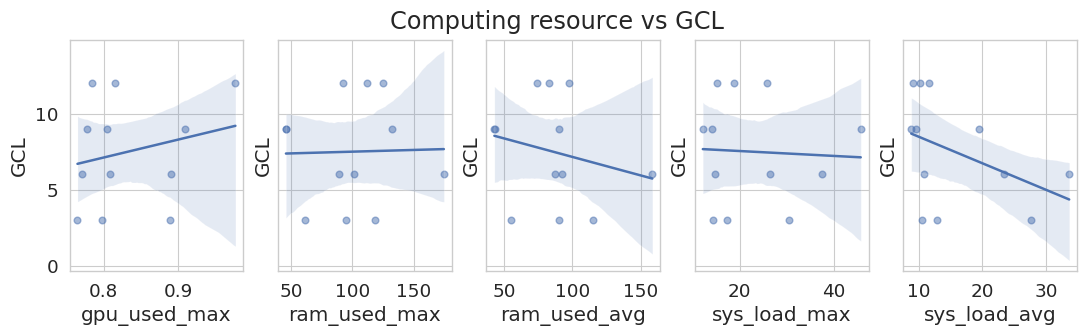

In [6]:
fig, axes = plt.subplots(1, 5, sharey=True)
fig.set_size_inches(13, 3)
fig.suptitle("Computing resource vs GCL")
sns.regplot(x='gpu_used_max', y='GCL', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[0])
sns.regplot(x='ram_used_max', y='GCL', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[1])
sns.regplot(x='ram_used_avg', y='GCL', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[2])
sns.regplot(x='sys_load_max', y='GCL', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[3])
sns.regplot(x='sys_load_avg', y='GCL', data=df_flop, scatter_kws={'alpha':0.5}, ax=axes[-1])

In [7]:
mod = sm.OLS(df_flop['test_r2'], df_flop['flops'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                test_r2   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.330
Method:                 Least Squares   F-statistic:                              6.913
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                      0.0234
Time:                        16:13:13   Log-Likelihood:                          6.7619
No. Observations:                  12   AIC:                                     -11.52
Df Residuals:                      11   BIC:                                     -11.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/hwang/simexp/hwang/ukbb_scaling_reports/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [8]:
mod = sm.OLS(df_flop['test_r2'], df_flop['F'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                test_r2   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              42.35
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                    4.38e-05
Time:                        16:13:13   Log-Likelihood:                          13.310
No. Observations:                  12   AIC:                                     -24.62
Df Residuals:                      11   BIC:                                     -24.14
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/hwang/simexp/hwang/ukbb_scaling_reports/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [9]:
mod = sm.OLS(df_flop['test_r2'], df_flop['GCL'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                test_r2   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              57.53
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                    1.08e-05
Time:                        16:13:13   Log-Likelihood:                          14.812
No. Observations:                  12   AIC:                                     -27.62
Df Residuals:                      11   BIC:                                     -27.14
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/hwang/simexp/hwang/ukbb_scaling_reports/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


<Axes: xlabel='F', ylabel='GCL'>

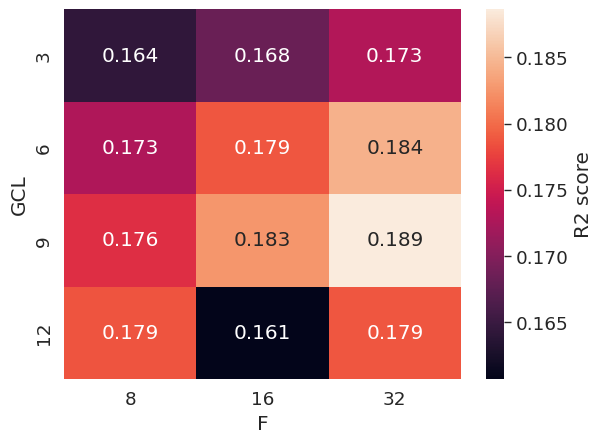

In [10]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'test_r2']].pivot(index='GCL', columns='F', values='test_r2'), annot=True, fmt=".3f", cbar_kws={'label': 'R2 score'})

<Axes: xlabel='F', ylabel='GCL'>

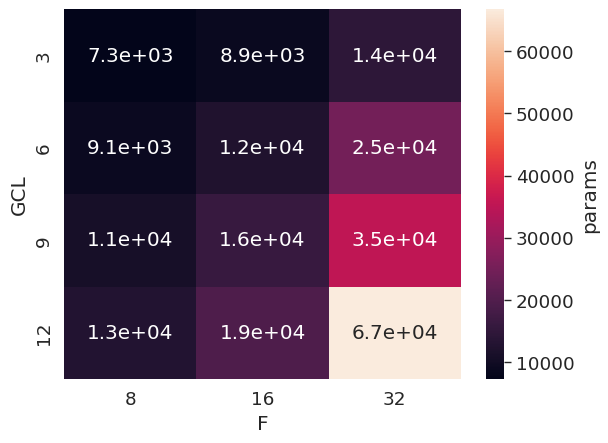

In [11]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'params']].pivot(index='GCL', columns='F', values='params'), annot=True , cbar_kws={'label': 'params'})

<Axes: xlabel='F', ylabel='GCL'>

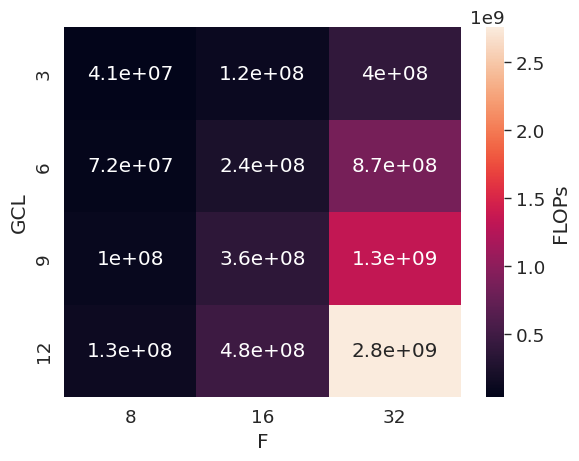

In [12]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'flops']].pivot(index='GCL', columns='F', values='flops'), annot=True , cbar_kws={'label': 'FLOPs'})

<Axes: xlabel='F', ylabel='GCL'>

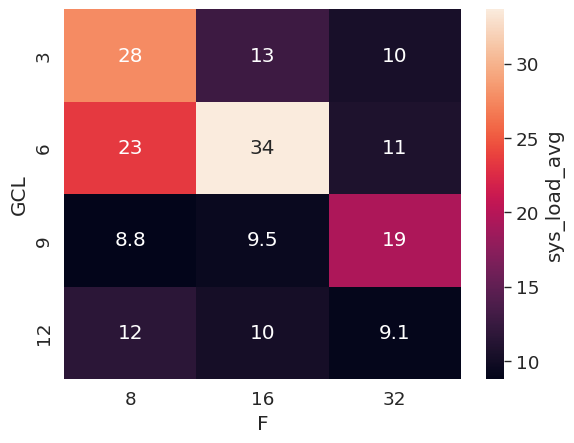

In [13]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'sys_load_avg']].pivot(index='GCL', columns='F', values='sys_load_avg'), annot=True , cbar_kws={'label': 'sys_load_avg'})

<Axes: xlabel='F', ylabel='GCL'>

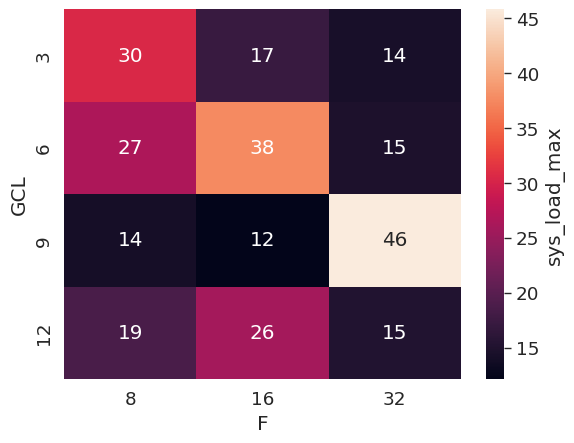

In [14]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'sys_load_max']].pivot(index='GCL', columns='F', values='sys_load_max'), annot=True , cbar_kws={'label': 'sys_load_max'})

<Axes: xlabel='F', ylabel='GCL'>

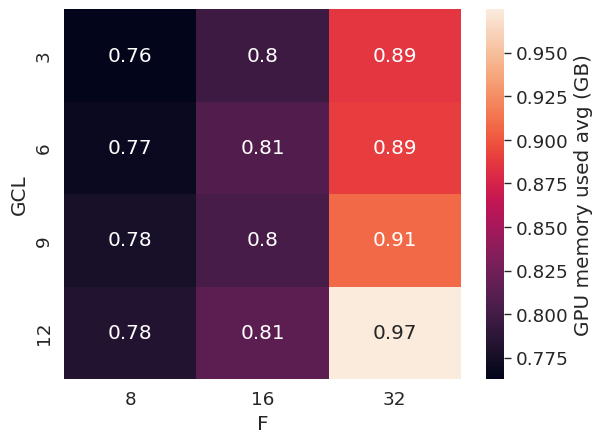

In [15]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'gpu_used_avg']].pivot(index='GCL', columns='F', values='gpu_used_avg'), annot=True , cbar_kws={'label': 'GPU memory used avg (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

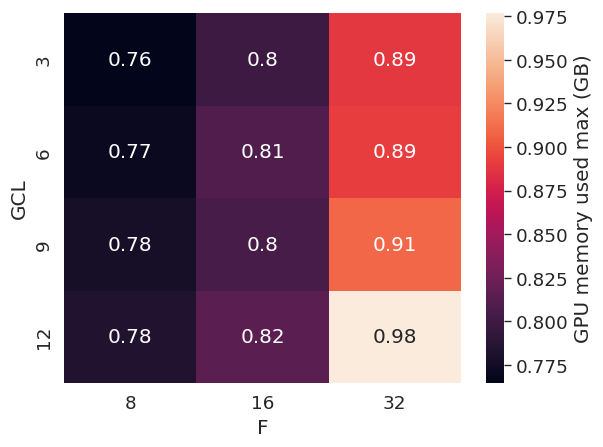

In [16]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'gpu_used_max']].pivot(index='GCL', columns='F', values='gpu_used_max'), annot=True , cbar_kws={'label': 'GPU memory used max (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

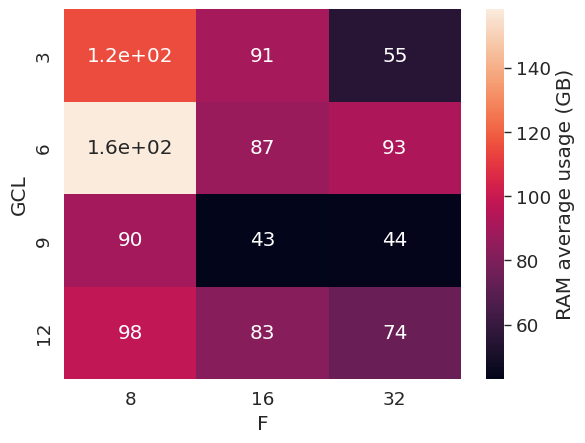

In [17]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'ram_used_avg']].pivot(index='GCL', columns='F', values='ram_used_avg'), annot=True , cbar_kws={'label': 'RAM average usage (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

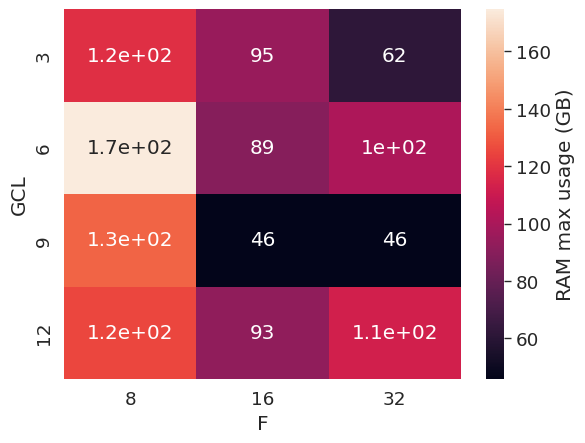

In [18]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'ram_used_max']].pivot(index='GCL', columns='F', values='ram_used_max'), annot=True , cbar_kws={'label': 'RAM max usage (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

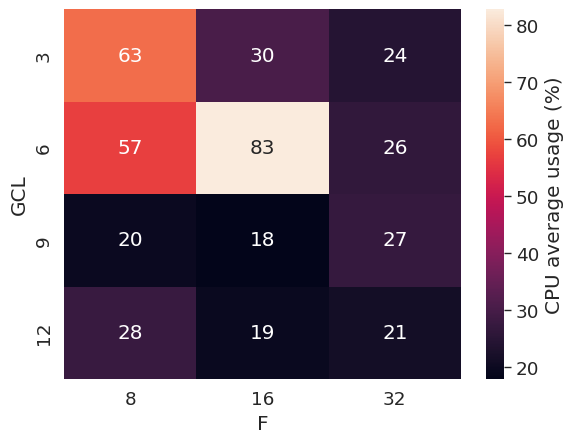

In [19]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'cpu_percent_avg']].pivot(index='GCL', columns='F', values='cpu_percent_avg'), annot=True , cbar_kws={'label': 'CPU average usage (%)'})

<Axes: xlabel='F', ylabel='GCL'>

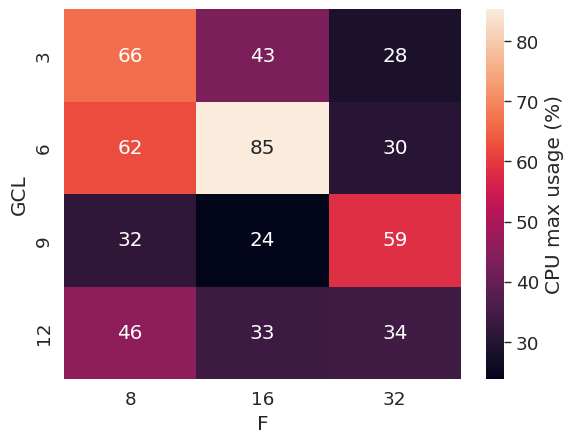

In [20]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'cpu_percent_max']].pivot(index='GCL', columns='F', values='cpu_percent_max'), annot=True , cbar_kws={'label': 'CPU max usage (%)'})